In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
import sys
import os

path = os.getcwd()
version = sys.version

print(path)
print(version)

C:\Users\patri\gitWorkspace\machineLearning
3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]


# data View

In [99]:
df = pd.DataFrame(data=diabetes.data)

In [103]:
df.columns = ['age', 'gender', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [104]:
df.head()

,age,gender,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [113]:
Y = pd.DataFrame(data=diabetes.target)
Y.head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


# Regression

In this practical we will explore some commonly used techniques for *regression*, i.e. the prediction of a continuous-valued response (**y**) from the features (**x**). Regression falls within supervised learning. Today we will concentrate on regression using Generalised Linear Models.


## The data

This example uses the `diabetes` dataset, which is provided as an example within scikit learn: http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset. 

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.



In [10]:
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


print("There are", len(diabetes.data), "data points")
print("There are", len(diabetes.data[0]), "features")

print("The first data point is")
#show the input feature set
print("x =", diabetes.data[0])

#show the corresponding response
print("y=", diabetes.target[0])

There are 442 data points
There are 10 features
The first data point is
x = [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
y= 151.0


In [134]:
# data params
X = diabetes.data
Y = diabetes.target

m = X.shape[0]
n = X.shape[1]

Note that the data have already been numerically coded, normalised and centred.


## Linear Regression Example

We will use the only the third feature of the `diabetes` dataset (BMI), in
order to illustrate a two-dimensional plot of this regression technique. 

In [114]:
# Use only the BMI feature
# bmi is the 2nd column in dataframe
diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X.shape

(442, 1)

In [220]:
from random import shuffle


# TOGGLES X FROM DATA MATRIX TO BMI VECTOR
X = diabetes_X


index = [i for i in range(len(data))]

shuffle(index)
# print(index)

random_1st = index[0]
print(random_1st)

x_1 = X[index[0:221]]
x_2 = X[index[221:]]

y_1 = Y[index[0:221]]
y_2 = Y[index[221:]]

13


In [221]:
# checks the the first random index value is setting to x_1[0] and y_1[0] correctly 
diabetes.data[random_1st] == x_1[0]
diabetes.target[random_1st] == y_1[0]

True

In [222]:
x_1.shape

(221, 1)

In a linear model, the target value is expected to be a linear combination of the input variables. We need to learn coefficients *w_i* for each feature and the intercept *w_0*.

w_0 = 156.90136257587176
w_1 = [912.77739559]


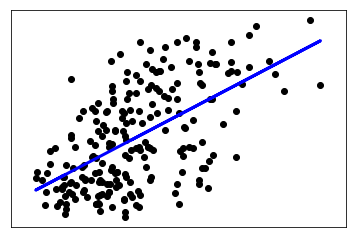

In [223]:
diabetes_X_train = x_1
diabetes_y_train = y_1

diabetes_X_test = x_2
diabetes_y_test = y_2


from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the training set
diabetes_y_pred = regr.predict(diabetes_X_train)

# The coefficients
print('w_0 =', regr.intercept_)
print('w_1 =', regr.coef_)

# Plot the fit to the training data
plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.plot(diabetes_X_train, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()



# w_0 = 149.88950381199683
# w_1 = [891.68285217]

# w_0 = [154.74779434862808]
# w_1 = [1014.45454011]


The straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

Now we can evaluate the model using the test data. We use the [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (r_2 score) as the performance metric - this quantifies the amount of variance that the model explains.

# Evaluation

Mean squared error: 3671.21
Variance score: 0.33


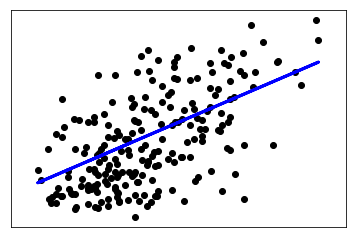

In [224]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Now repeat the linear regression using **all** of the input features - does it perform any better? 

## Ridge regression
Where variables are highly correlated, we would like to improve our models by making the coefficients as small as possible. Ridge regression imposes a penalty on the size of coefficients and minimizes a penalized residual sum of squares. This is called regularization using an l2-norm.

We specify a parameter *alpha*, which controls the amount of *shrinkage*: the larger the value of *alpha*, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

In [217]:
reg = linear_model.Ridge(alpha = .5)
# reg = linear_model.Ridge(alpha = 0.065816026)


# Add code to train and test your ridge regression model using the fit() method as above.

To investigate the form of the model, we can plot a *regularization path*. Each color represents a different feature of the coefficient vector, and this is displayed as a function of the regularization parameter.

For some datasets, a slight change in the target variable can cause huge variances in the calculated weights. In such cases, it is useful to set a certain regularization (alpha) to reduce this variation (noise).

When alpha is very large, the regularization effect dominates the squared loss function and the coefficients tend to zero. At the end of the path, as alpha tends toward zero and the solution tends towards the ordinary least squares, coefficients exhibit big oscillations. In practise it is necessary to tune alpha in such a way that a balance is maintained between both.

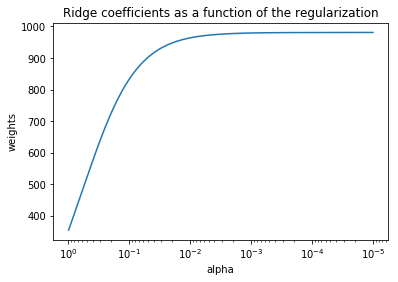

In [226]:



import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# use only your training set here

X = x_1
y = y_1

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-5, -0.001, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

We can choose a suitable value of alpha using cross-validation with `RidgeCV`. The parameter `cv` determines the number of folds.

In [219]:
n_alphas = 200
reg = linear_model.RidgeCV(alphas = np.logspace(-5, -0.001, n_alphas),cv=10)
reg.fit(X,y)       
reg.alpha_                                      


0.06581602636816052

How well does the model perform on unseen data?

0.066

## My Model

w_0 = 156.90136257587176
w_1 = [912.77739559]


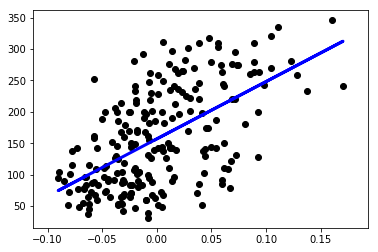

In [233]:
# DOES NOT RESPOND TO ANY PARAMETER CHANGES NOT SURE WHAT ISSUE IS


reg = linear_model.Ridge(alpha = 2)
# regr = linear_model.LinearRegression()

reg.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_train)

print('w_0 =', regr.intercept_)
print('w_1 =', regr.coef_)

# Plot the fit to the training data
plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.plot(diabetes_X_train, diabetes_y_pred, color='blue', linewidth=3)

plt.show()

## Lasso

The Lasso is a linear model that estimates sparse coefficients, which are regularised using an l1 norm.

It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent.



In [ ]:
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X,y)


Plot the regularization path of the Lasso model for the diabetes data.

The function `LassoCV` uses cross-validation to optimise alpha, in the same way as `RidgeCV`. Try it below.

## Feature selection

Because Lasso gives a sparse model, it can be useful in performing feature selection. We will use the function `SelectFromModel()` to do this with the diabetes data. Insert your chosen value of alpha below.

In [ ]:
from sklearn.feature_selection import SelectFromModel

print("original X has dimensions",X.shape)

reg = linear_model.Lasso(alpha = )
reg.fit(X,y)

model = SelectFromModel(reg, prefit=True)
X_new = model.transform(X)
print("new X has dimensions",X_new.shape)

print("These features were selected:")
print(model.get_support())

Did you succeed in producing a simpler model? What were the features selected? How well does this model perform, compared to one using all features?

If time allows, investigate how to use a [learning curve](http://scikit-learn.org/stable/modules/learning_curve.html) to assess how much training data is needed for each approach.